In [343]:
'''
import yfinance as yf

data = yf.download( 
        tickers = "^GSPC,^VIX,^FVX,GC=F",
        period = "max",
        interval = "1d",
        ignore_tz = False,
        group_by = 'ticker',
        auto_adjust = True,
        repair = False,
        prepost = True,
        threads = True,
        proxy = None,
        start="2001-01-01",
        end="2023-01-01"    
    )

print(data.info)
print(data.describe())
'''

'\nimport yfinance as yf\n\ndata = yf.download( \n        tickers = "^GSPC,^VIX,^FVX,GC=F",\n        period = "max",\n        interval = "1d",\n        ignore_tz = False,\n        group_by = \'ticker\',\n        auto_adjust = True,\n        repair = False,\n        prepost = True,\n        threads = True,\n        proxy = None,\n        start="2001-01-01",\n        end="2023-01-01"    \n    )\n\nprint(data.info)\nprint(data.describe())\n'

In [344]:

'''
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (10, 10))
fig.tight_layout(pad=1.0)
plt.rcParams.update({'font.size': 12})
print(data[[('^GSPC','Close')]])
data.plot( y = [('^GSPC','Close')], kind='line',linewidth=1.0,ax=axes[0,0])
axes[0,0].legend(['S&P500'])
data.plot(y = [('^VIX','Close')], kind='line',linewidth=1.0,ax=axes[0,1])
axes[0,1].legend(['VIX Volatility Index'])
data.plot(y = [('^FVX','Close')], kind='line',linewidth=1.0,ax=axes[1,0])
axes[1,0].legend(['Treasury Yield 5 Years'])
data.plot(y = [('GC=F','Close')], kind='line',linewidth=1.0,ax=axes[1,1])
axes[1,1].legend(['Gold'])
'''

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nsns.set_style(\'whitegrid\')\nplt.style.use("fivethirtyeight")\n\nfig, axes = plt.subplots(nrows=2, ncols=2,figsize = (10, 10))\nfig.tight_layout(pad=1.0)\nplt.rcParams.update({\'font.size\': 12})\nprint(data[[(\'^GSPC\',\'Close\')]])\ndata.plot( y = [(\'^GSPC\',\'Close\')], kind=\'line\',linewidth=1.0,ax=axes[0,0])\naxes[0,0].legend([\'S&P500\'])\ndata.plot(y = [(\'^VIX\',\'Close\')], kind=\'line\',linewidth=1.0,ax=axes[0,1])\naxes[0,1].legend([\'VIX Volatility Index\'])\ndata.plot(y = [(\'^FVX\',\'Close\')], kind=\'line\',linewidth=1.0,ax=axes[1,0])\naxes[1,0].legend([\'Treasury Yield 5 Years\'])\ndata.plot(y = [(\'GC=F\',\'Close\')], kind=\'line\',linewidth=1.0,ax=axes[1,1])\naxes[1,1].legend([\'Gold\'])\n'

In [345]:
'''
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
data_norm = scalar.fit_transform(np.array(data[['Close']]))

plt.figure(figsize = (6, 4))
plt.plot( data_norm, linewidth = 1.0)
'''


"\nimport numpy as np\nfrom sklearn.preprocessing import MinMaxScaler\nscalar = MinMaxScaler(feature_range = (0,1))\ndata_norm = scalar.fit_transform(np.array(data[['Close']]))\n\nplt.figure(figsize = (6, 4))\nplt.plot( data_norm, linewidth = 1.0)\n"

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed
                                   SNP         GOLD        VIX  BONDS
Date                                                                 
2001-01-02 00:00:00-05:00  1283.270020   268.399994  29.990000  4.752
2001-01-03 00:00:00-05:00  1347.560059   268.000000  26.600000  4.923
2001-01-04 00:00:00-05:00  1333.339966   267.299988  26.969999  4.808
2001-01-05 00:00:00-05:00  1298.349976   268.000000  28.670000  4.672
2001-01-08 00:00:00-05:00  1295.859985   268.000000  29.840000  4.601
...                                ...          ...        ...    ...
2022-12-23 00:00:00-05:00  3844.820068  1795.900024  20.870001  3.862
2022-12-27 00:00:00-05:00  3829.250000  1814.800049  21.650000  3.963
2022-12-28 00:00:00-05:00  3783.219971  1807.900024  22.139999  3.979
2022-12-29 00:00:00-05:00  3849.280029  1819.500000  21.440001  3.955
2022-12-30 00:00:00-05

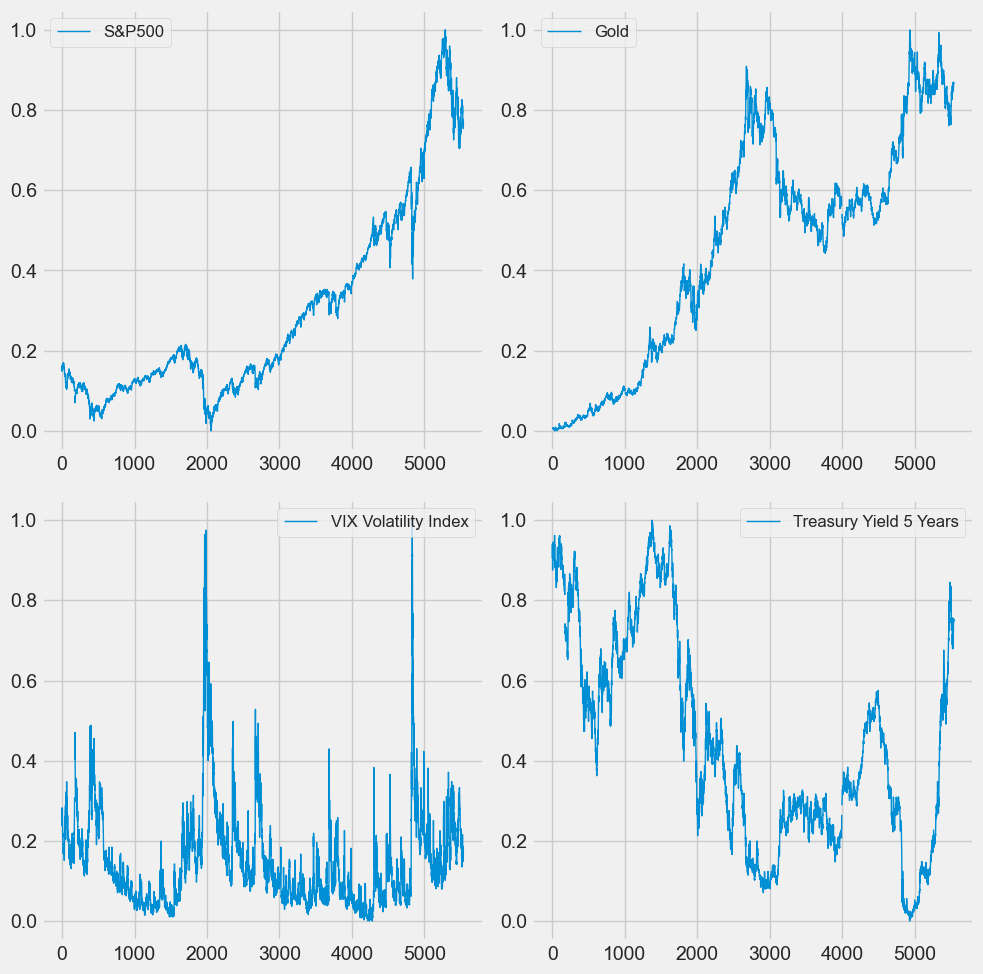

In [346]:
import sys
sys.path.insert(1, r"C:/Users/mihao/OneDrive - Univerza v Ljubljani/Doktorski_studij/Delo/Evolving transformer")
from importlib import reload 
import data.dataclass as dataclass
reload(dataclass)

database = dataclass.StockData()

database.display_data_norm()

print(database.data_dropped)
print(database.data_norm)

print(database.datasnp_dropped)
print(database.datasnp_norm)
scalar = database.scalarsnp

In [347]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class Stockdataset(Dataset):
    def __init__(self, data, seq_len = 100, output_length = 1):
        self.data = data
        self.data = torch.from_numpy(data).float().view(-1)
        self.seq_len = seq_len
        self.out_len = output_length

    def __len__(self):
        return len(self.data)-self.seq_len-1

    def __getitem__(self, index):
        #return self.data[index : index+self.seq_len], self.data[index+self.seq_len+self.step]
        return self.data[index : index+self.seq_len], self.data[index+self.seq_len+1: index+self.seq_len+self.out_len+1]
        #ZAKAJ index+self.seq_len, in ne +1 -> print(data_norm[1 : 1+2,:]); print(data_norm[2,:])


size_training = int(len(database.datasnp_norm)*0.9)
size_test = len(database.datasnp_norm) - size_training
data_train, data_test = database.datasnp_norm[0:size_training,:], database.datasnp_norm[size_training:len(database.datasnp_norm),:], 
print(data_train.shape)
print(data_test.shape)

input_length = 100
output_length = 1
train_dataset = Stockdataset(data_train,input_length,output_length)
test_dataset = Stockdataset(data_test,input_length,output_length)
whole_dataset = Stockdataset(database.datasnp_norm,input_length,output_length)

print(test_dataset.__getitem__(1)[0].shape)
print(train_dataset.__getitem__(1)[1].shape)

(4428, 1)
(1107, 1)
torch.Size([100])
torch.Size([1])


In [348]:
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size, drop_last = True) #drop_last = True ignores last batch is data is not divisable by batch_size
test_dataloader = DataLoader(test_dataset, batch_size, drop_last = True)
whole_dataloader = DataLoader(whole_dataset, 1, drop_last = False)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


In [349]:
class Lstm_model(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size, num_layers):
        super(Lstm_model, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_dim
        self.output_size = output_dim
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_size, num_layers=num_layers)
        self.fc = nn.Linear(hidden_size, output_dim)

    def forward(self, x, hn, cn):
        out, (hn, cn) = self.lstm(x, (hn,cn))
        final_out = self.fc(out) #-1 returns last element
        #final_out = self.fc(out)
        return final_out[-1], hn, cn

    def predict(self, x):
        hn, cn = self.init()
        final_out = self.fc(out)
        #final_out = self.fc(out)
        return final_out[-1]

    def init(self):
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device) #zakaj je batch_size tako?
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        return h0,c0


input_dim = 1
output_dim = 1
hidden_size = 5
num_layers = 3

model = Lstm_model(input_dim, output_dim, hidden_size, num_layers).to(device)



In [350]:
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [351]:
def train(dataloader):
    hn, cn = model.init()
    model.train()
    for batch, item in enumerate(dataloader):
        x, y = item
        x = x.to(device)
        y = y.to(device)
        out, hn, cn = model(x.reshape(input_length,batch_size, 1), hn, cn)
        #out, hn, cn = model(x, hn, cn)
        loss = loss_fun(out.reshape(output_dim, batch_size), y.reshape(output_dim, batch_size))
        hn = hn.detach() #detach hn is not a parameters and does not need to be updated!!!
        cn = cn.detach()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch == len(dataloader) -1:
            loss = loss.item()
            print(f"Train loss: {loss:>7f}")

In [352]:
def test(dataloader):
    hn, cn = model.init()
    for batch, item in enumerate(dataloader):
        x, y = item
        x = x.to(device)
        y = y.to(device)
        out, hn, cn = model(x.reshape(input_length, batch_size, 1), hn, cn)
        loss = loss_fun(out.reshape(output_length, batch_size), y.reshape(output_length, batch_size))
        
        if batch == len(dataloader) -1:
            loss = loss.item()
            print(f"Test loss: {loss:>7f}")
            

In [353]:
def train(dataloader):
    hn, cn = model.init()
    model.train()
    for batch, item in enumerate(dataloader):
        x, y = item
        x = x.to(device)
        y = y.to(device)
        out, hn, cn = model(x.reshape(input_length,batch_size, 1), hn, cn)
        #out, hn, cn = model(x, hn, cn)
        loss = loss_fun(out.reshape(output_length, batch_size), y.reshape(output_length, batch_size))
        hn = hn.detach() #detach hn is not a parameters and does not need to be updated!!!
        cn = cn.detach()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch == len(dataloader) -1:
            loss = loss.item()
            print(f"Train loss: {loss:>7f}")

In [354]:
epochs = 100
for epoch in range(epochs):
    print(f"Epoch {epoch}")
    train(train_dataloader)
    test(test_dataloader)


Epoch 0
Train loss: 0.473089
Test loss: 1.121061
Epoch 1
Train loss: 0.251328
Test loss: 0.756500
Epoch 2
Train loss: 0.093332
Test loss: 0.449439
Epoch 3
Train loss: 0.083477
Test loss: 0.431557
Epoch 4
Train loss: 0.086214
Test loss: 0.436963
Epoch 5
Train loss: 0.085121
Test loss: 0.433726
Epoch 6
Train loss: 0.084671
Test loss: 0.431932
Epoch 7
Train loss: 0.084205
Test loss: 0.429991
Epoch 8
Train loss: 0.083681
Test loss: 0.427816
Epoch 9
Train loss: 0.083095
Test loss: 0.425356
Epoch 10
Train loss: 0.082411
Test loss: 0.422479
Epoch 11
Train loss: 0.081583
Test loss: 0.419012
Epoch 12
Train loss: 0.080545
Test loss: 0.414704
Epoch 13
Train loss: 0.079188
Test loss: 0.409169
Epoch 14
Train loss: 0.077321
Test loss: 0.401804
Epoch 15
Train loss: 0.074595
Test loss: 0.391680
Epoch 16
Train loss: 0.070292
Test loss: 0.377579
Epoch 17
Train loss: 0.062903
Test loss: 0.358799
Epoch 18
Train loss: 0.050521
Test loss: 0.335979
Epoch 19
Train loss: 0.036873
Test loss: 0.307441
Epoch 20
T

In [355]:
import math
from sklearn.metrics import mean_squared_error
import numpy as np
def calculate_metrics(dataloader):
    pred_arr = []
    y_arr = []
    with torch.no_grad():
        hn, cn = model.init()
        for batch, item in enumerate(dataloader):
            x, y = item
            x, y = x.to(device), y.to(device)
            x = x.view(input_length, batch_size,1)
            pred = model(x, hn, cn)[0]
            pred = pred.view(batch_size,output_length)
            pred = scalar.inverse_transform(pred.detach().cpu().numpy()).reshape(-1)
            y = scalar.inverse_transform(y.detach().cpu().numpy().reshape(-1,1)).reshape(-1)
            pred_arr = pred_arr + list(pred)
            y_arr = y_arr + list(y)
        return math.sqrt(mean_squared_error(y_arr,pred_arr))



In [356]:
print(f"Train MSE loss {calculate_metrics(train_dataloader)}")
print(f"Test MSE loss {calculate_metrics(test_dataloader)}")

Train MSE loss 70.22095081664553
Test MSE loss 1028.8144269011784


In [357]:
def simulate(dataloader):
    pred_arr = []
    y_arr = []
    with torch.no_grad():
        hn, cn = model.init()
        for batch, item in enumerate(dataloader):
            x, y = item
            x, y = x.to(device), y.to(device)
            x = x.view(input_length, 1,1)
            pred = model(x, hn, cn)[0]
            pred = pred.view(1,output_length)
            pred = scalar.inverse_transform(pred.detach().cpu().numpy()).reshape(-1)
            y = scalar.inverse_transform(y.detach().cpu().numpy().reshape(-1,1)).reshape(-1)
            pred_arr = pred_arr + [list(pred)[-1]]
            y_arr = y_arr + [list(y)[-1]]
            #pred_arr = pred_arr + list(pred[-1])
            #y_arr = y_arr + list(y[-1])
        return pred_arr, y_arr


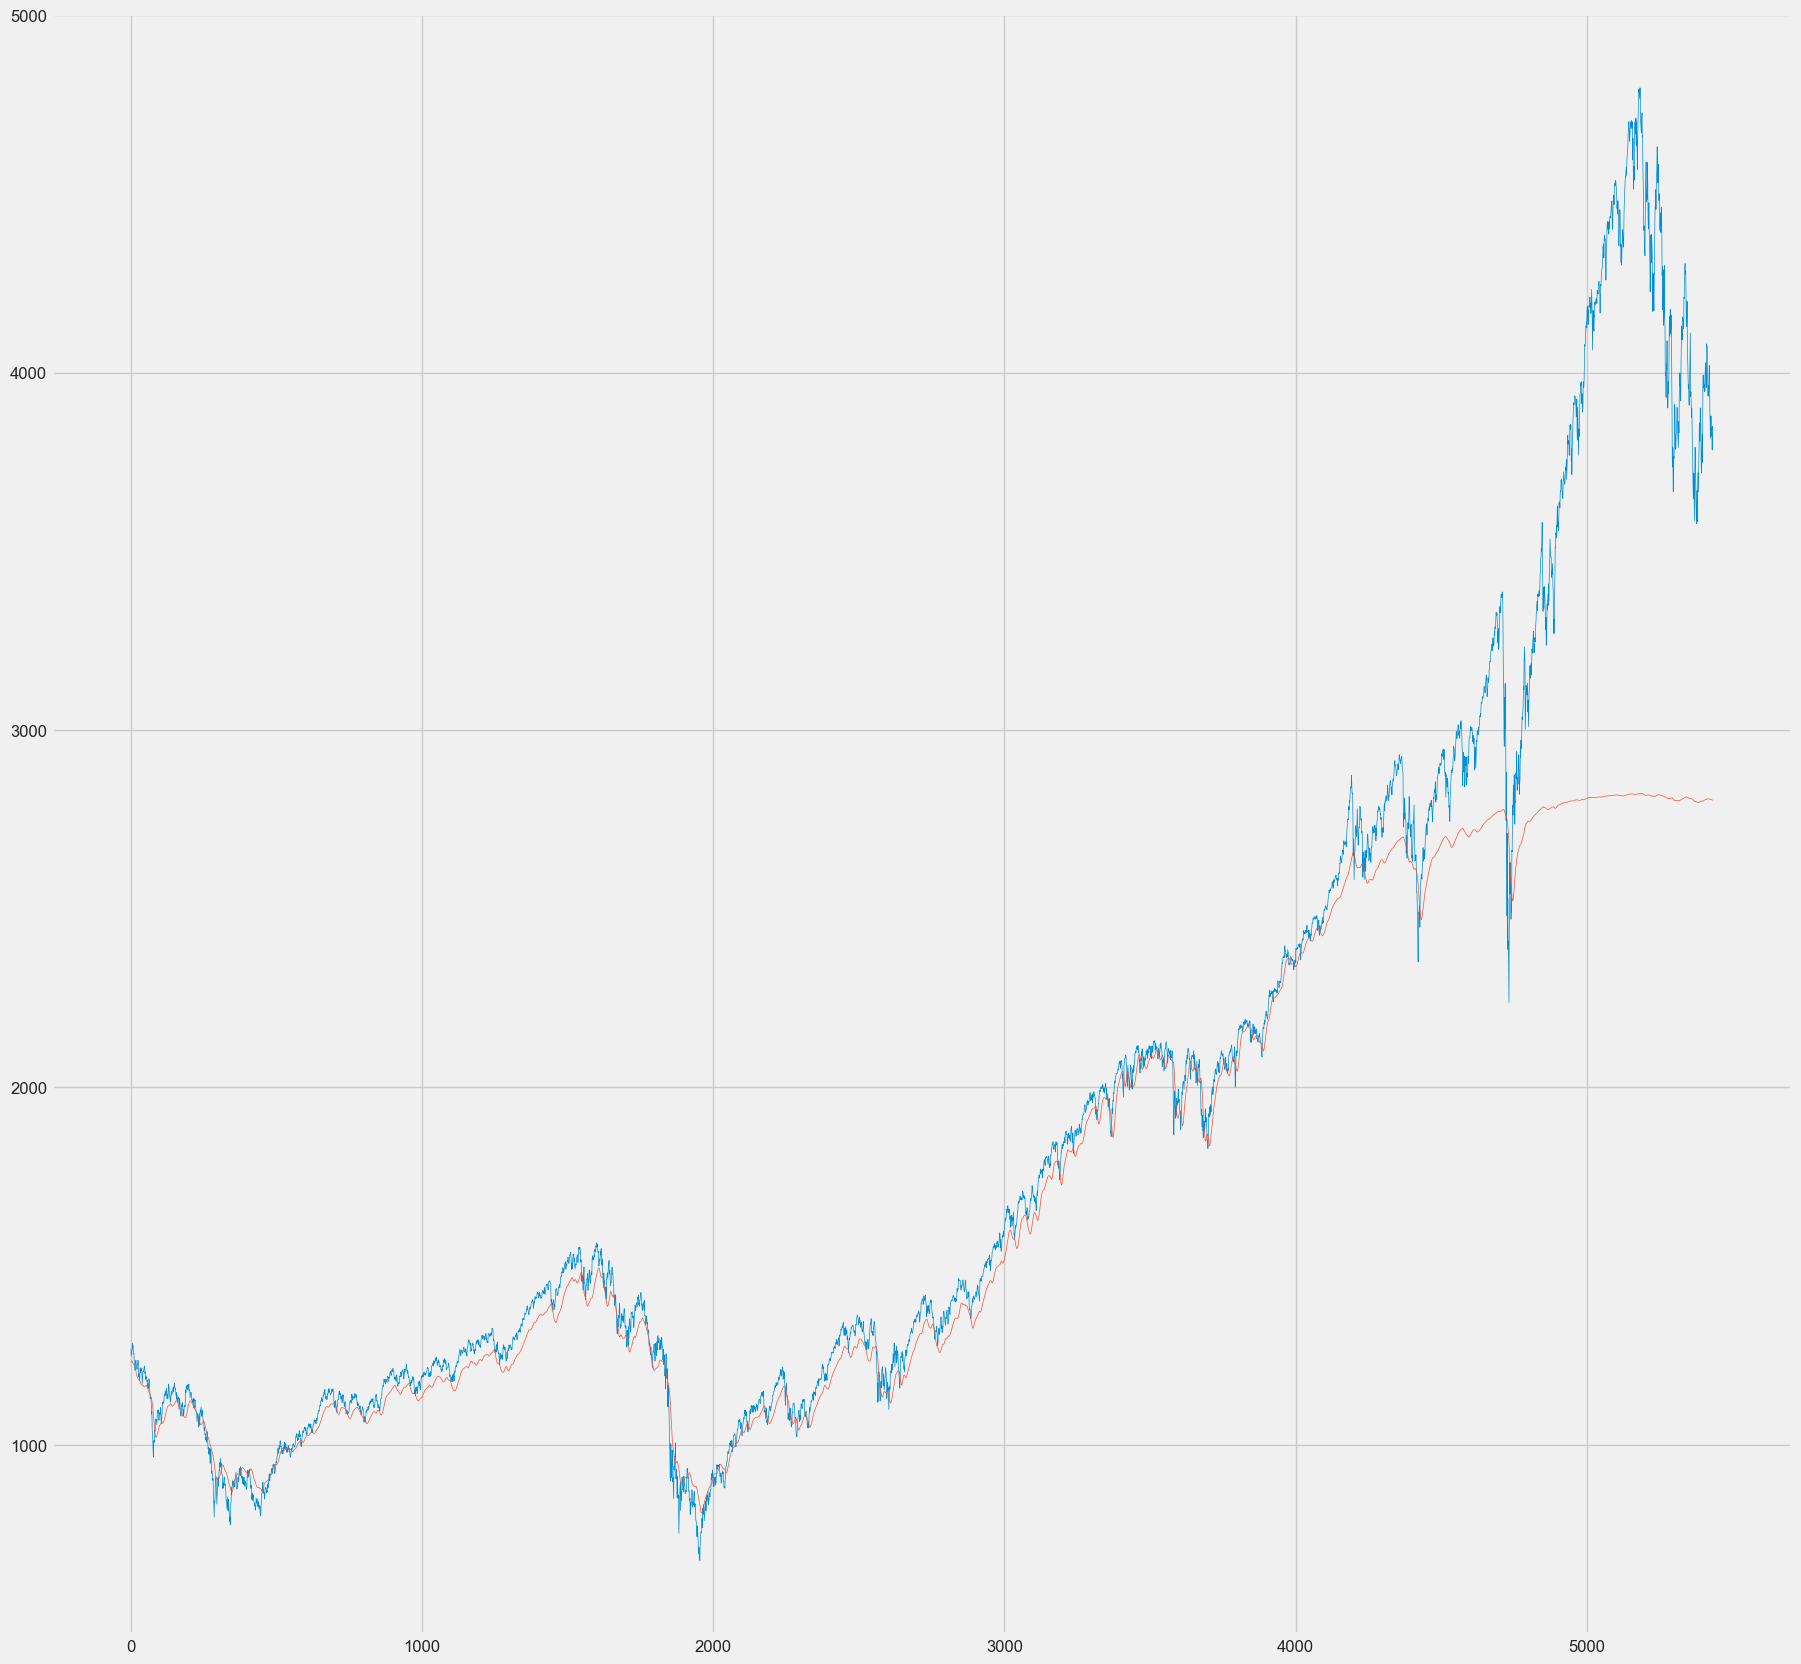

In [358]:
batch_size = 1
whole_pred_arr, whole_y_arr = simulate(whole_dataloader)

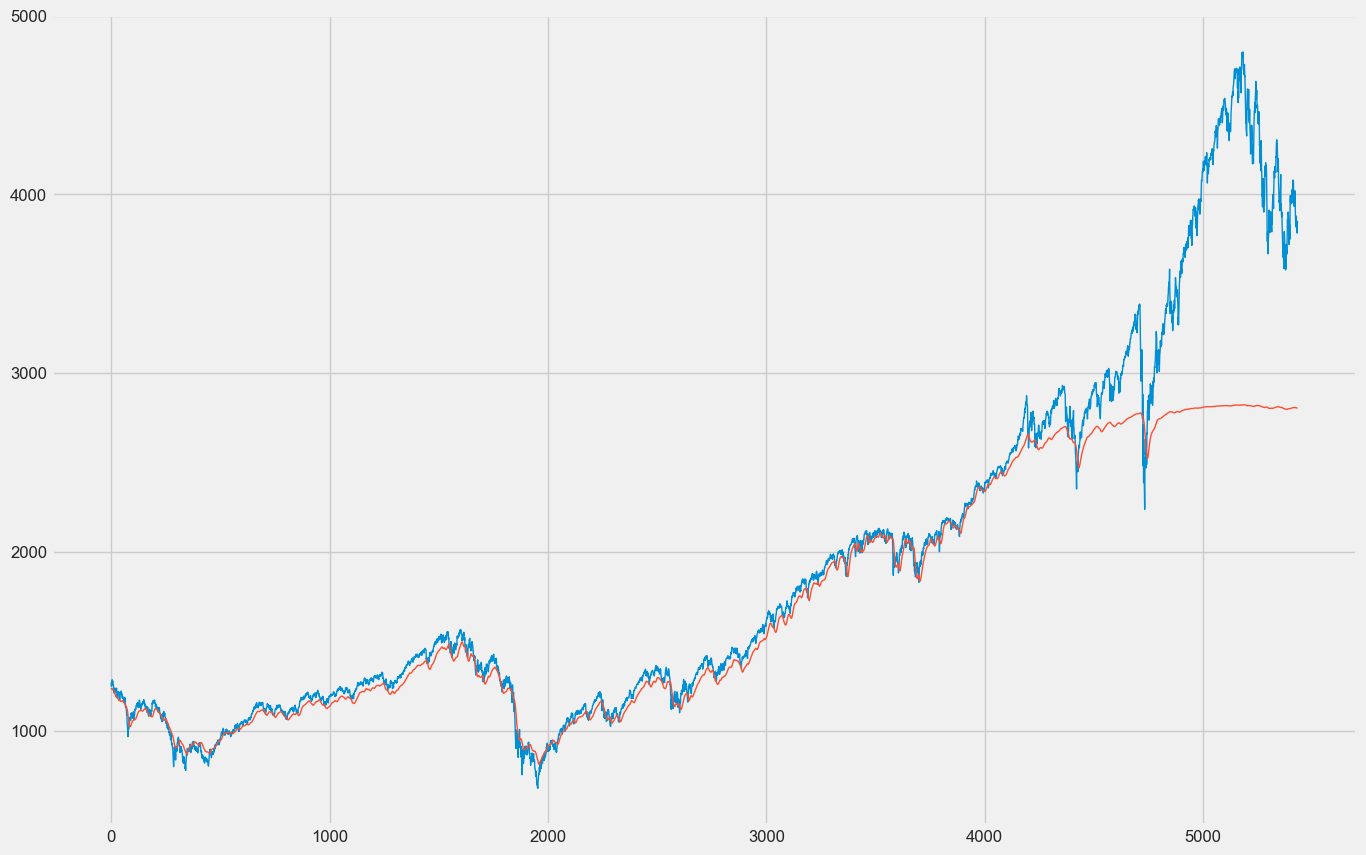

In [360]:
fig1, axes1 = plt.subplots(figsize = (15, 10))
axes1.plot(whole_y_arr, linewidth=1)
axes1.plot(whole_pred_arr, linewidth=1)

fig1.savefig("whole.pdf")